In [1]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt

In [2]:
import os
# Importing Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# import tensorflow.keras.layers.BatchNormalization


In [3]:
# from tensorflow.keras.layers import BatchNormalization

In [5]:

# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 5, strides = (4, 4), padding = 'valid', input_shape=(128, 128, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
# classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 5, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
# classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 2, strides = (1, 1), padding='valid', activation = 'relu'))
# classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 2, strides = (1, 1), padding='valid', activation = 'relu'))
# classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 2, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
# classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
# classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
# classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
# classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
# classifier.summary()

In [6]:
glob.glob('dataset/train/*/*')
path = 'dataset/train\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

In [7]:
# image = tf.io.read_file(path)
# image_array = tf.image.decode_jpeg(image)

In [17]:
BATCH_SIZE = 50
EPOCHS = 30
IMG_HEIGHT = 128
IMG_WIDTH = 128
# CLASS_NAMES = [i.split('\\')[1] for i in glob.glob('dataset/train/*')]

In [18]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(1./255)

In [19]:
train_data_gen = image_generator.flow_from_directory(directory='dataset/train',
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     seed=123,
                                                     class_mode='sparse',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 70295 images belonging to 38 classes.


In [20]:
validation_data_gen = image_generator.flow_from_directory(directory='dataset/valid',
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     seed=123,
                                                     class_mode='sparse',
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 17572 images belonging to 38 classes.


In [21]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
classifier.fit(train_data_gen, validation_data=validation_data_gen, epochs=EPOCHS, callbacks=[cp_callback])

Train for 1406 steps, validate for 352 steps
Epoch 1/30


c:\python\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1405/1406 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9692
Epoch 00001: saving model to training_1/cp.ckpt
1406/1406 [==============================] - 281s 200ms/step - loss: 0.0917 - accuracy: 0.9692 - val_loss: 0.2687 - val_accuracy: 0.9266
Epoch 2/30
1405/1406 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9760
Epoch 00002: saving model to training_1/cp.ckpt
1406/1406 [==============================] - 278s 198ms/step - loss: 0.0750 - accuracy: 0.9760 - val_loss: 1.3051 - val_accuracy: 0.7721
Epoch 3/30


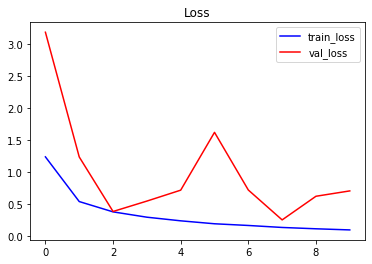

In [15]:
plt.plot(classifier.history.__dict__['history']['loss'], color='b', label="train_loss")
plt.plot(classifier.history.__dict__['history']['val_loss'], color='r', label="val_loss")
plt.title("Loss")
plt.legend()

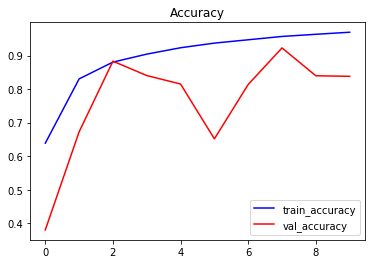

In [16]:
plt.plot(classifier.history.__dict__['history']['accuracy'], color='b', label="train_accuracy")
plt.plot(classifier.history.__dict__['history']['val_accuracy'], color='r', label="val_accuracy")
plt.title("Accuracy")
plt.legend()

In [16]:
# classifier.predict()

In [22]:
classes = {}
for k in train_data_gen.class_indices.keys():
    classes[train_data_gen.class_indices[k]] = k

In [77]:
image = r'C:\afrid\Backup\Practise\Python\Plant Disease\dataset\test\test\CornCommonRust2.jpg'
image = tf.io.read_file(image)
image_array = tf.image.decode_jpeg(image)
image_array = tf.image.resize(image_array, (128,128))

In [78]:
# classifier.predict(image_array.numpy().reshape((1,128,128,3)))

In [79]:
class_index = classifier.predict_classes(image_array.numpy().reshape((1,128,128,3)))[0]
class_index

8

In [80]:
classes[class_index]

'Corn_(maize)___Common_rust_'

In [52]:
# classifier.save('trained_model_20epochs.h5')

In [33]:
# classifier.save_weights('trained_model_weights_20epochs')